# Used-car

머신 러닝 경쟁 사이트인 kaggle의 public dataset인 [Used cars database](https://www.kaggle.com/orgesleka/used-cars-database) 에 나온 데이터를 이용해 다양한 그래프를 그려보기.

위의 데이터셋은 독일의 사이트인 Ebay-Kleinanzeigen에서 차량의 중고거래 정보를 긁어서 저장한 것이다. 아래 명령의 실행결과를 보면 알 수 있듯이, 대략 37만개의 데이터가 존재한다. 앞서 다뤘던 그래프 그리는 방법을 이용해 다양한 그래프를 그려볼 것이다.

In [1]:
!wc -l data/autos.csv

  371825 data/autos.csv


## `head`

데이터의 종류를 확인하면 다음과 같다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 항상 include할 선언.
# numpy와 pandas, plot을 가능하게 해준다.

In [3]:
autos = pd.read_csv('data/autos.csv', encoding='latin1') # 독일에서 만든 데이터라 인코딩이 이상함
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Tiguan

위 개수를 보면 알듯이 371k개의 거래 내역으로, 사람이 입력한 값이라 차량의 이름도 제각각이고 개수도 너무 많아 적당한 개수로 줄이고 싶어서 눈으로 데이터를 확인하며 차량을 골랐다. 그 중 티구안 140PS 차량의 경우 [위키](https://en.wikipedia.org/wiki/Volkswagen_Tiguan)에 나온 것처럼 전부 디젤차량으로 변수가 적다고 생각하여 선택했다. 그 중 오토메틱 차량만을 선택해 185개 샘플을 얻었다.

```shell
$ cat data/autos.csv | grep -i tiguan | grep automatik,140 | wc -l
185
# 헤더는 따로 복사함
$ head -1 data/autos.csv > data/tiguan140.csv
$ cat data/autos.csv | grep -i tiguan | grep automatik,140 >> data/tiguan140.csv
```

셸 단에서 데이터를 가공해 새로운 파일을 만들었는데, `pandas`를 이용해도 똑같이 필터링하여 데이터량를 축소할 수 있다. 하지만 아직은 셸을 쓰는 것이 익숙하므로 미리 잘라두었다.

데이터 중에, **가격**에 영향을 미치는 요소는 _**주행거리**_라고 가정하고, _주행거리가 길 수록 가격이 낮을 것이란 가설을 세운다_. 실제로 어떠한지 그림을 그려 확인했다.

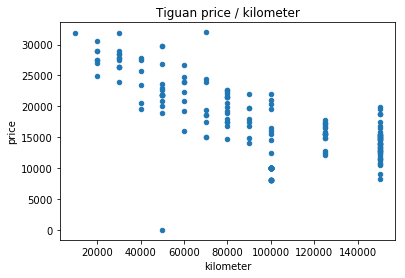

In [4]:
!head -1 data/autos.csv > data/tiguan140.csv
!cat data/autos.csv | grep -i tiguan | grep automatik,140 >> data/tiguan140.csv

tiguan = pd.read_csv('data/tiguan140.csv', encoding='latin1') # 독일에서 만든 데이터라 인코딩이 이상함
tiguan.plot(kind='scatter', title='Tiguan price / kilometer', x='kilometer', y='price')

위에 그려진 그림을 보면, 예상했던 것처럼 주행거리가 늘어날 수록 차량 가격이 낮아지는 추세가 보인다.

## Outlier 제거

5만 킬로미터의 데이터를 보면, 가격이 0으로 올라온 거래가 있다. 이는 거래 사이트에 사람이 가격을 잘못 올렸거나, 데이터 수집시 문제가 있던 것이라 추측할 수 있다. 이렇게 일반적인 관측값과 유독 다른 데이터를 갖는 것을 **아웃라이어**라고 한다. 회귀 문제나, 분류 문제를 가리지 않고 아웃라이어는 자연적으로 존재할 수 있다. 예를 들어 차량 매매의 경우에서, 급히 돈이 필요해 속칭 쿨매매를 했다고 치면, 일반적인 값보다 훨씬 낮은 가격에 차량을 팔았을 것이다.

하지만 이 데이터셋에 있는 0 가격은 현실에서 있을 수 없는 데이터로 _오류_임이 분명하니, 데이터셋에서 제거한다.

In [5]:
tiguan['price'].values

tiguan_no_outlier = tiguan.query('price != 0')
tiguan_no_outlier

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-10 21:38:58,Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_Automati...,privat,Angebot,13950,control,suv,2009,automatik,140,tiguan,150000,12,diesel,volkswagen,nein,2016-03-10 00:00:00,0,36448,2016-04-06 19:18:07
1,2016-03-07 23:36:22,Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_DSG_Spor...,privat,Angebot,21990,test,suv,2012,automatik,140,tiguan,90000,5,diesel,volkswagen,nein,2016-03-07 00:00:00,0,38464,2016-04-05 16:44:51
2,2016-03-14 20:21:42,Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_Automati...,privat,Angebot,15000,control,suv,2008,automatik,140,tiguan,70000,11,diesel,volkswagen,nein,2016-03-13 00:00:00,0,61231,2016-04-06 12:44:23
3,2016-03-28 14:25:21,Tiguan_2.0_TDI_4Motion_DSG_Sport&Style,privat,Angebot,8000,test,suv,2011,automatik,140,tiguan,100000,8,diesel,volkswagen,nein,2016-03-28 00:00:00,0,60311,2016-03-28 14:25:21
4,2016-03-21 15:50:02,Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_BlueMoti...,privat,Angebot,19800,control,suv,2012,automatik,140,tiguan,90000,10,diesel,volkswagen,nein,2016-03-21 00:00:00,0,89561,2016-03-21 15:50:02
5,2016-03-26 14:39:36,Volkswagen_Tiguan_2.0_TDI_4M_DSG_2x_R_line_Vol...,privat,Angebot,18790,test,suv,2010,automatik,140,tiguan,150000,11,diesel,volkswagen,nein,2016-03-25 00:00:00,0,65817,2016-04-07 05:17:05
6,2016-03-25 12:36:53,Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_Automati...,privat,Angebot,15390,test,suv,2009,automatik,140,tiguan,150000,12,diesel,volkswagen,nein,2016-03-25 00:00:00,0,84432,2016-03-30 01:45:32
7,2016-03-22 08:56:18,Volkswagen_Tiguan_2.0_TDI_4Motion_DSG_Navi_GRA...,privat,Angebot,14500,control,suv,2010,automatik,140,tiguan,100000,4,diesel,volkswagen,ja,2016-03-22 00:00:00,0,93309,2016-03-26 09:45:00
8,2016-03-15 10:37:00,Volkswagen_Tiguan,privat,Angebot,16599,control,suv,2009,automatik,140,tiguan,125000,3,diesel,volkswagen,nein,2016-03-15 00:00:00,0,64646,2016-04-05 20:47:27
9,2016-03-07 20:50:00,Volkswagen_Tiguan_2.0_TDI_R_Line_4M_DSG_19Zoll...,privat,Angebot,29750,test,suv,2013,automatik,140,tiguan,50000,1,diesel,volkswagen,nein,2016-03-07 00:00:00,0,87437,2016-04-05 17:25:46


## Simple linear regression

그 다음 선형회귀를 이용해 추세선을 그려보았다.

In [6]:
from sklearn import datasets, linear_model
reg = linear_model.LinearRegression()

x = tiguan_no_outlier[['kilometer']] # 다변수를 지원해 한 feature만 분석할 때도 array(list)를 씌운다.
y = tiguan_no_outlier['price']

reg.fit(x, y)

coef = reg.coef_
inter = reg.intercept_
(coef[0], inter)

(-0.10589871428178543, 27511.843850554164)

Simple linear regression, 단순선형회귀는 일차식으로 아래 식으로 표현할 수 있다.

$ y = \alpha + \beta{x} $

앞서 계산했던 coefficient가 베타, intercept가 알파이다.

선형회귀를 통해 얻은 값으로 그림을 다시 그려보면,

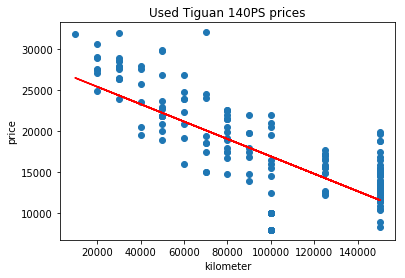

15333.491708148838

In [7]:
kilo = tiguan_no_outlier['kilometer']
price_regression = lambda x: inter + x * coef[0]
plt.scatter(kilo, tiguan_no_outlier['price'])
plt.plot(kilo, price_regression(kilo), color='r')
plt.xlabel('kilometer')
plt.ylabel('price')
plt.title('Used Tiguan 140PS prices')
plt.show()

price_regression(115000)

scatter로 표현한 원본 데이터에 추가로 선형회귀를 통한 추세를 빨간 선으로 그렸다. 만약 115000km를 탄 차라면 15333 유로를 받을 것으로 기대해볼 수 있다.

## training and test set

현재까진 가지고 있는 모든 데이터를 사용하여 선형회귀를 통한 추세를 구했다. 하지만, 회귀의 용도는 예측이니 내가 세운 모델이 적절한지 테스트할 데이터도 있어야 한다. 데이터셋을 서로 다른 두 세트로 분리해 학습과 테스트를 위해 사용하기도 한다.

케글에서는 경쟁을 위해 전체 데이터셋을 분리해 대회 참가자들 위해 데이터셋을 공개하고, 참가자들이 이 셋을 이용해 모델을 짠다. 사이트는 비공개 데이터셋을 이용해 제출받은 모델을 검증한다.

전체 데이터셋을 회귀 모델을 구하기 위한 training set, 테스트하여 정확도를 판정하기 위한 test set으로 분리하여 모델의 정확도를 검증했다. train set과 test set의 비율은 6:4이고, random seed는 임의로 정한 1234를 사용한다. 동일한 seed를 사용해야 어느 환경에서 테스트해도 동일한 결과가 나온다.

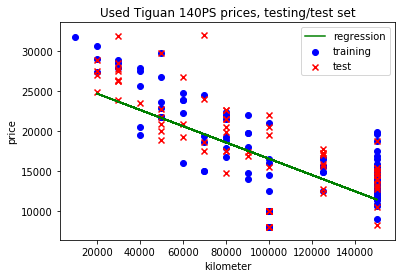

0.53374768724221511

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1234)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

coef = reg.coef_
inter = reg.intercept_
price_regression = lambda x: inter + x * coef[0]

plt.scatter(x_train, y_train, color='blue', marker='o', label='training')
plt.scatter(x_test, y_test, color='red', marker='x', label='test')
plt.plot(x_test, price_regression(x_test), color='green', label='regression')
plt.xlabel('kilometer')
plt.ylabel('price')
plt.legend()
plt.title('Used Tiguan 140PS prices, testing/test set')
plt.show()

#reg.predict(x_test)
reg.score(x_test, y_test) # R squared

score는 결정계수 R squared or coefficient of determination으로 0에서 1 사이의 값을 가진다. 1에 가까울수록 관측치가 추정된 회귀선 위에 값이 나타나는 것이다. 즉, 0으로 갈수록 부정확한 모델이고 1로 갈수록 정확한 모델이란 뜻이다. 여기선 0.53이란 값이 중간정도의 값이 나왔다.

만약 random seed를 다른 값으로 바꾸면 이 값이 0.4점대로도 떨어지는 걸 확인할 수 있다. 즉, 연관이 없진 않지만 아주 정확한 모델은 아니라고 설명할 수 있다.

케글에 올라온 커널들을 보면, 우수한 예측은 대략 0.8 이 넘는 값을 같는 것 같다.


## pandas를 이용해 필터링하기

앞에선 `grep`을 이용해 데이터를 필터링했다. pandas 자체 기능으로 필터링을 수행하는 과정은 다음과 같다.

In [9]:
## 셸로 수행했던 명령
# $ cat data/autos.csv | grep -i tiguan | grep automatik,140 >> data/tiguan140.csv

## 엄청 느림
indices = [ i for i, item in autos.iterrows() if item.str.contains(r'(?i)tiguan', na=False).values.any() ]
tiguan2 = autos.loc[indices] # 931 rows x 20 columns
tiguan2 = tiguan2.query("powerPS == 140 and gearbox == 'automatik'")
tiguan2

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3671,2016-03-10 21:38:58,Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_Automati...,privat,Angebot,13950,control,suv,2009,automatik,140,tiguan,150000,12,diesel,volkswagen,nein,2016-03-10 00:00:00,0,36448,2016-04-06 19:18:07
9030,2016-03-07 23:36:22,Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_DSG_Spor...,privat,Angebot,21990,test,suv,2012,automatik,140,tiguan,90000,5,diesel,volkswagen,nein,2016-03-07 00:00:00,0,38464,2016-04-05 16:44:51
10951,2016-03-14 20:21:42,Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_Automati...,privat,Angebot,15000,control,suv,2008,automatik,140,tiguan,70000,11,diesel,volkswagen,nein,2016-03-13 00:00:00,0,61231,2016-04-06 12:44:23
12045,2016-03-28 14:25:21,Tiguan_2.0_TDI_4Motion_DSG_Sport&Style,privat,Angebot,8000,test,suv,2011,automatik,140,tiguan,100000,8,diesel,volkswagen,nein,2016-03-28 00:00:00,0,60311,2016-03-28 14:25:21
13684,2016-03-21 15:50:02,Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_BlueMoti...,privat,Angebot,19800,control,suv,2012,automatik,140,tiguan,90000,10,diesel,volkswagen,nein,2016-03-21 00:00:00,0,89561,2016-03-21 15:50:02
14382,2016-03-26 14:39:36,Volkswagen_Tiguan_2.0_TDI_4M_DSG_2x_R_line_Vol...,privat,Angebot,18790,test,suv,2010,automatik,140,tiguan,150000,11,diesel,volkswagen,nein,2016-03-25 00:00:00,0,65817,2016-04-07 05:17:05
14592,2016-03-25 12:36:53,Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_Automati...,privat,Angebot,15390,test,suv,2009,automatik,140,tiguan,150000,12,diesel,volkswagen,nein,2016-03-25 00:00:00,0,84432,2016-03-30 01:45:32
19024,2016-03-22 08:56:18,Volkswagen_Tiguan_2.0_TDI_4Motion_DSG_Navi_GRA...,privat,Angebot,14500,control,suv,2010,automatik,140,tiguan,100000,4,diesel,volkswagen,ja,2016-03-22 00:00:00,0,93309,2016-03-26 09:45:00
21221,2016-03-15 10:37:00,Volkswagen_Tiguan,privat,Angebot,16599,control,suv,2009,automatik,140,tiguan,125000,3,diesel,volkswagen,nein,2016-03-15 00:00:00,0,64646,2016-04-05 20:47:27
22198,2016-03-07 20:50:00,Volkswagen_Tiguan_2.0_TDI_R_Line_4M_DSG_19Zoll...,privat,Angebot,29750,test,suv,2013,automatik,140,tiguan,50000,1,diesel,volkswagen,nein,2016-03-07 00:00:00,0,87437,2016-04-05 17:25:46


앞서 `wc -l` 명령으로 확인했을 땐 185 라인이었는데, 지금은 186 rows 라고 나타난다. 이 차이는 어디에서 왔을까?? 


### Joining two DataFrames

pandas에서 자른 방식과, gnu grep으로 자른 방식은 동일하다(고 보인다). 하지만 이 두 데이터엔 차이가 있는데, 이 문제를 확인하기 위해 데이터를 가공해본다. 다음 [링크](http://stackoverflow.com/questions/20225110/comparing-two-dataframes-and-getting-the-differences) 를 확인하면, 일치하는 column으로 구성된 두 DataFrame 중, 한 DataFrame에서만 등장하는 데이터들을 볼 수 있다. 따라해보면,


In [10]:
tiguan_merge = pd.concat([tiguan, tiguan2])
tiguan_merge = tiguan_merge.reset_index(drop=True)

# group by
grby = tiguan_merge.groupby(list(tiguan_merge.columns))

# get unique records
unqidx = [x[0] for x in grby.groups.values() if len(x) == 1]

tiguan_merge.reindex(unqidx)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
289,2016-03-08 19:54:52,Tiguan_Sport_&_Style_2_0_tdi_DSG_NAVI_RÜCKFAHR...,privat,Angebot,14800,test,suv,2008,automatik,140,tiguan,90000,9,diesel,volkswagen,nein,2016-03-08 00:00:00,0,50676,2016-03-10 16:47:48


명백히 우리가 원하던 티구안, 오토매틱, 140PS 차량인데 grep에서 누락되었다. 이를 설명하기 위해 원본을 다시 확인해보니, 다음과 같은 문제를 발견했다.

In [11]:
!grep -i tiguan data/autos.csv | tail -n1


Binary file data/autos.csv matches


## csv 파일 직접 다룰 땐

csv 파일은 바이너리 파일이라서, grep 으로 패턴 매칭할 때 텍스트 파일로 간주하도록 -a 또는 --text 옵션을 주어야 한다. 다시 준 다음 파일을 만들어 비교해보면,

In [12]:
!head -1 data/autos.csv > data/tiguan140text.csv
!grep -ai tiguan data/autos.csv | grep -a automatik,140 >> data/tiguan140text.csv

tiguan3 = pd.read_csv('data/tiguan140text.csv', encoding='latin1')
print("tiguan, grep", len(tiguan))
print("tiguan2, pandas pattern matching:", len(tiguan2))
print("tiguan3, grep -a", len(tiguan3))

print(tiguan2.head(2))
print(tiguan3.head(2))

tiguan2.equals(tiguan3)

tiguan, grep 185
tiguan2, pandas pattern matching: 186
tiguan3, grep -a 186
              dateCrawled                                               name  \
3671  2016-03-10 21:38:58  Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_Automati...   
9030  2016-03-07 23:36:22  Volkswagen_Tiguan_2.0_TDI_DPF_4Motion_DSG_Spor...   

      seller offerType  price   abtest vehicleType  yearOfRegistration  \
3671  privat   Angebot  13950  control         suv                2009   
9030  privat   Angebot  21990     test         suv                2012   

        gearbox  powerPS   model  kilometer  monthOfRegistration fuelType  \
3671  automatik      140  tiguan     150000                   12   diesel   
9030  automatik      140  tiguan      90000                    5   diesel   

           brand notRepairedDamage          dateCreated  nrOfPictures  \
3671  volkswagen              nein  2016-03-10 00:00:00             0   
9030  volkswagen              nein  2016-03-07 00:00:00             0   

      po

False

## index 동기화

두 데이터셋을 보면 동일한 데이터를 갖고 있지만, equals엔 실패했다. 두 셋의 차이는 index가 다르단 것이다.

index를 다시 세팅해 비교해보면,

In [13]:
tiguan4 = tiguan2.copy().reset_index(drop=True)
tiguan4.equals(tiguan3)

True

## pandas 필터링 요약
* pandas 를 사용하면 grep을 사용하는 것보다 사소한 에러를 덜 신경써도 된다.
 * 하지만 grep 보다는 많이 느리다.
* csv 파일은 binary 파일이다.
 * 가급적 직접 핸들링하지 말자.
 * csv를 grep 할 땐 '-a' 옵션을 주자.
 * open() 을 이용하면 'b' 옵션이 필요하다.

## 등록년도

원본 데이터를 보면, 차량들의 등록년월 정보가 같이 있다. 독일 중고차 사이트의 데이터를 보고, 독일에서 어느 시즌에 차가 많이 팔리는지 예측이 가능해본다.

우선 연도 데이터를 확인한다.

In [14]:
years = autos['yearOfRegistration']
years.value_counts()

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
2003    19873
2004    19746
2002    19189
1998    17951
2007    17673
2008    16175
2009    15607
1997    14706
2010    12354
2011    12068
1996    10886
2017    10546
2016     9859
1995     9658
2012     9418
2013     6157
1994     4872
2014     4802
2018     3993
1993     3469
1992     3048
2015     2982
1990     2852
1991     2810
1989     1342
        ...  
5900        1
2066        1
6500        1
9229        1
8500        1
8200        1
2290        1
3700        1
1200        1
9450        1
1001        1
1255        1
1253        1
5600        1
3800        1
4800        1
7100        1
5300        1
3500        1
1911        1
2200        1
1688        1
1925        1
3200        1
1920        1
1919        1
1915        1
7800        1
1400        1
8455        1
Name: yearOfRegistration, dtype: int64

1200년, 8455년등과 같은 믿을 수 없는 데이터가 많다. 만약 상위 40개만 추려보면,

In [15]:
years.value_counts()[:40]

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
2003    19873
2004    19746
2002    19189
1998    17951
2007    17673
2008    16175
2009    15607
1997    14706
2010    12354
2011    12068
1996    10886
2017    10546
2016     9859
1995     9658
2012     9418
2013     6157
1994     4872
2014     4802
2018     3993
1993     3469
1992     3048
2015     2982
1990     2852
1991     2810
1989     1342
1988      965
1985      787
1987      697
1980      629
1986      576
1983      455
1984      422
1970      370
1982      335
1979      312
Name: yearOfRegistration, dtype: int64

대충 훑어보면 원본 데이터 생성 시점까지 거래된 중고차는 2000년대 초반에 생산된 차량이 가장 많은 듯 하다. 5년마다 그룹핑해서 확인하면,

In [16]:
years_group = years.value_counts()[:40].groupby(lambda years: years // 5 * 5).aggregate(np.sum)
years_group

1970       370
1975       312
1980      1841
1985      4367
1990     17051
1995     75968
2000    103577
2005     92001
2010     44799
2015     27380
Name: yearOfRegistration, dtype: int64

visualize하면,

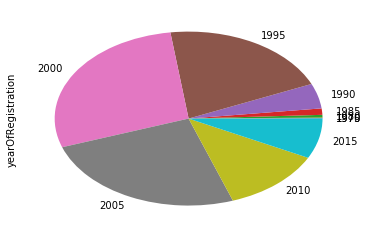

In [17]:
years_group.plot.pie()

In [18]:
mon = autos['monthOfRegistration']
mon2 = mon.value_counts()
mon2

0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: monthOfRegistration, dtype: int64

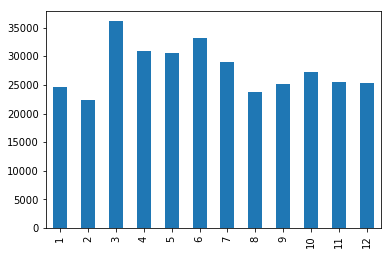

In [19]:
mon2.sort_index().drop(labels=[0]).plot.bar()

1990년부터 2015년까지 등록된 차량에 대해 그려보면,

In [20]:
ym = autos[['yearOfRegistration', 'monthOfRegistration']]
ym.columns = [ x[:(lambda s: next(i for i, x in enumerate(s) if not x.islower()))(x)] for x in ym.columns ]
recent = ym.drop(ym.query('(not 1995 <= year <= 2015) or month == 0').index)
recent

,year,month
1,2011,5
2,2004,8
3,2001,6
4,2008,7
5,1995,10
6,2004,8
8,2014,8
10,2004,12
11,2005,12
12,1995,11


In [21]:
recent2 = recent.groupby(list(recent.columns)).size()
recent2

year  month
1995  1         549
      2         455
      3         785
      4         688
      5         817
      6         722
      7         634
      8         497
      9         576
      10        604
      11        493
      12        522
1996  1         631
      2         567
      3         927
      4         878
      5         857
      6        1127
      7         836
      8         630
      9         582
      10        824
      11        668
      12        730
1997  1         962
      2         857
      3        1318
      4        1252
      5        1113
      6        1254
               ... 
2013  7         486
      8         439
      9         414
      10        426
      11        423
      12        351
2014  1         377
      2         324
      3         531
      4         518
      5         397
      6         393
      7         360
      8         330
      9         421
      10        422
      11        352
      12        318
2015  1 

In [22]:
recent3 = list(zip(*recent2.iteritems()))
keys = [ str(k) for k in recent3[0] ]
vals = recent3[1]

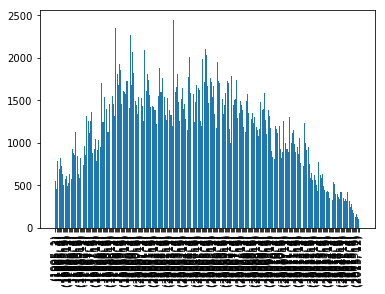

In [23]:
plt.bar(list(range(len(keys))), vals)
plt.xticks(list(range(len(keys))), keys, rotation='vertical')
plt.show()